<a href="https://colab.research.google.com/github/sharifulla01/Heart-Disease-Prediction-using-Machine-Learning/blob/main/Heart_Disease_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
df = pd.read_csv('/content/heart.csv', sep = ',')

In [116]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [117]:
df.shape

(918, 12)

In [118]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0




# ```Explatory Data **Analyse**

```



In [119]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [120]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [122]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
columns = df.columns
column_types = df.dtypes

label_encoder = LabelEncoder()
scaler = StandardScaler()

for column in columns:
    if column_types[column] == 'object':  # Categorical data
        # Apply label encoding
        df[column] = label_encoder.fit_transform(df[column])

In [123]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


In [124]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [125]:
import seaborn as sns

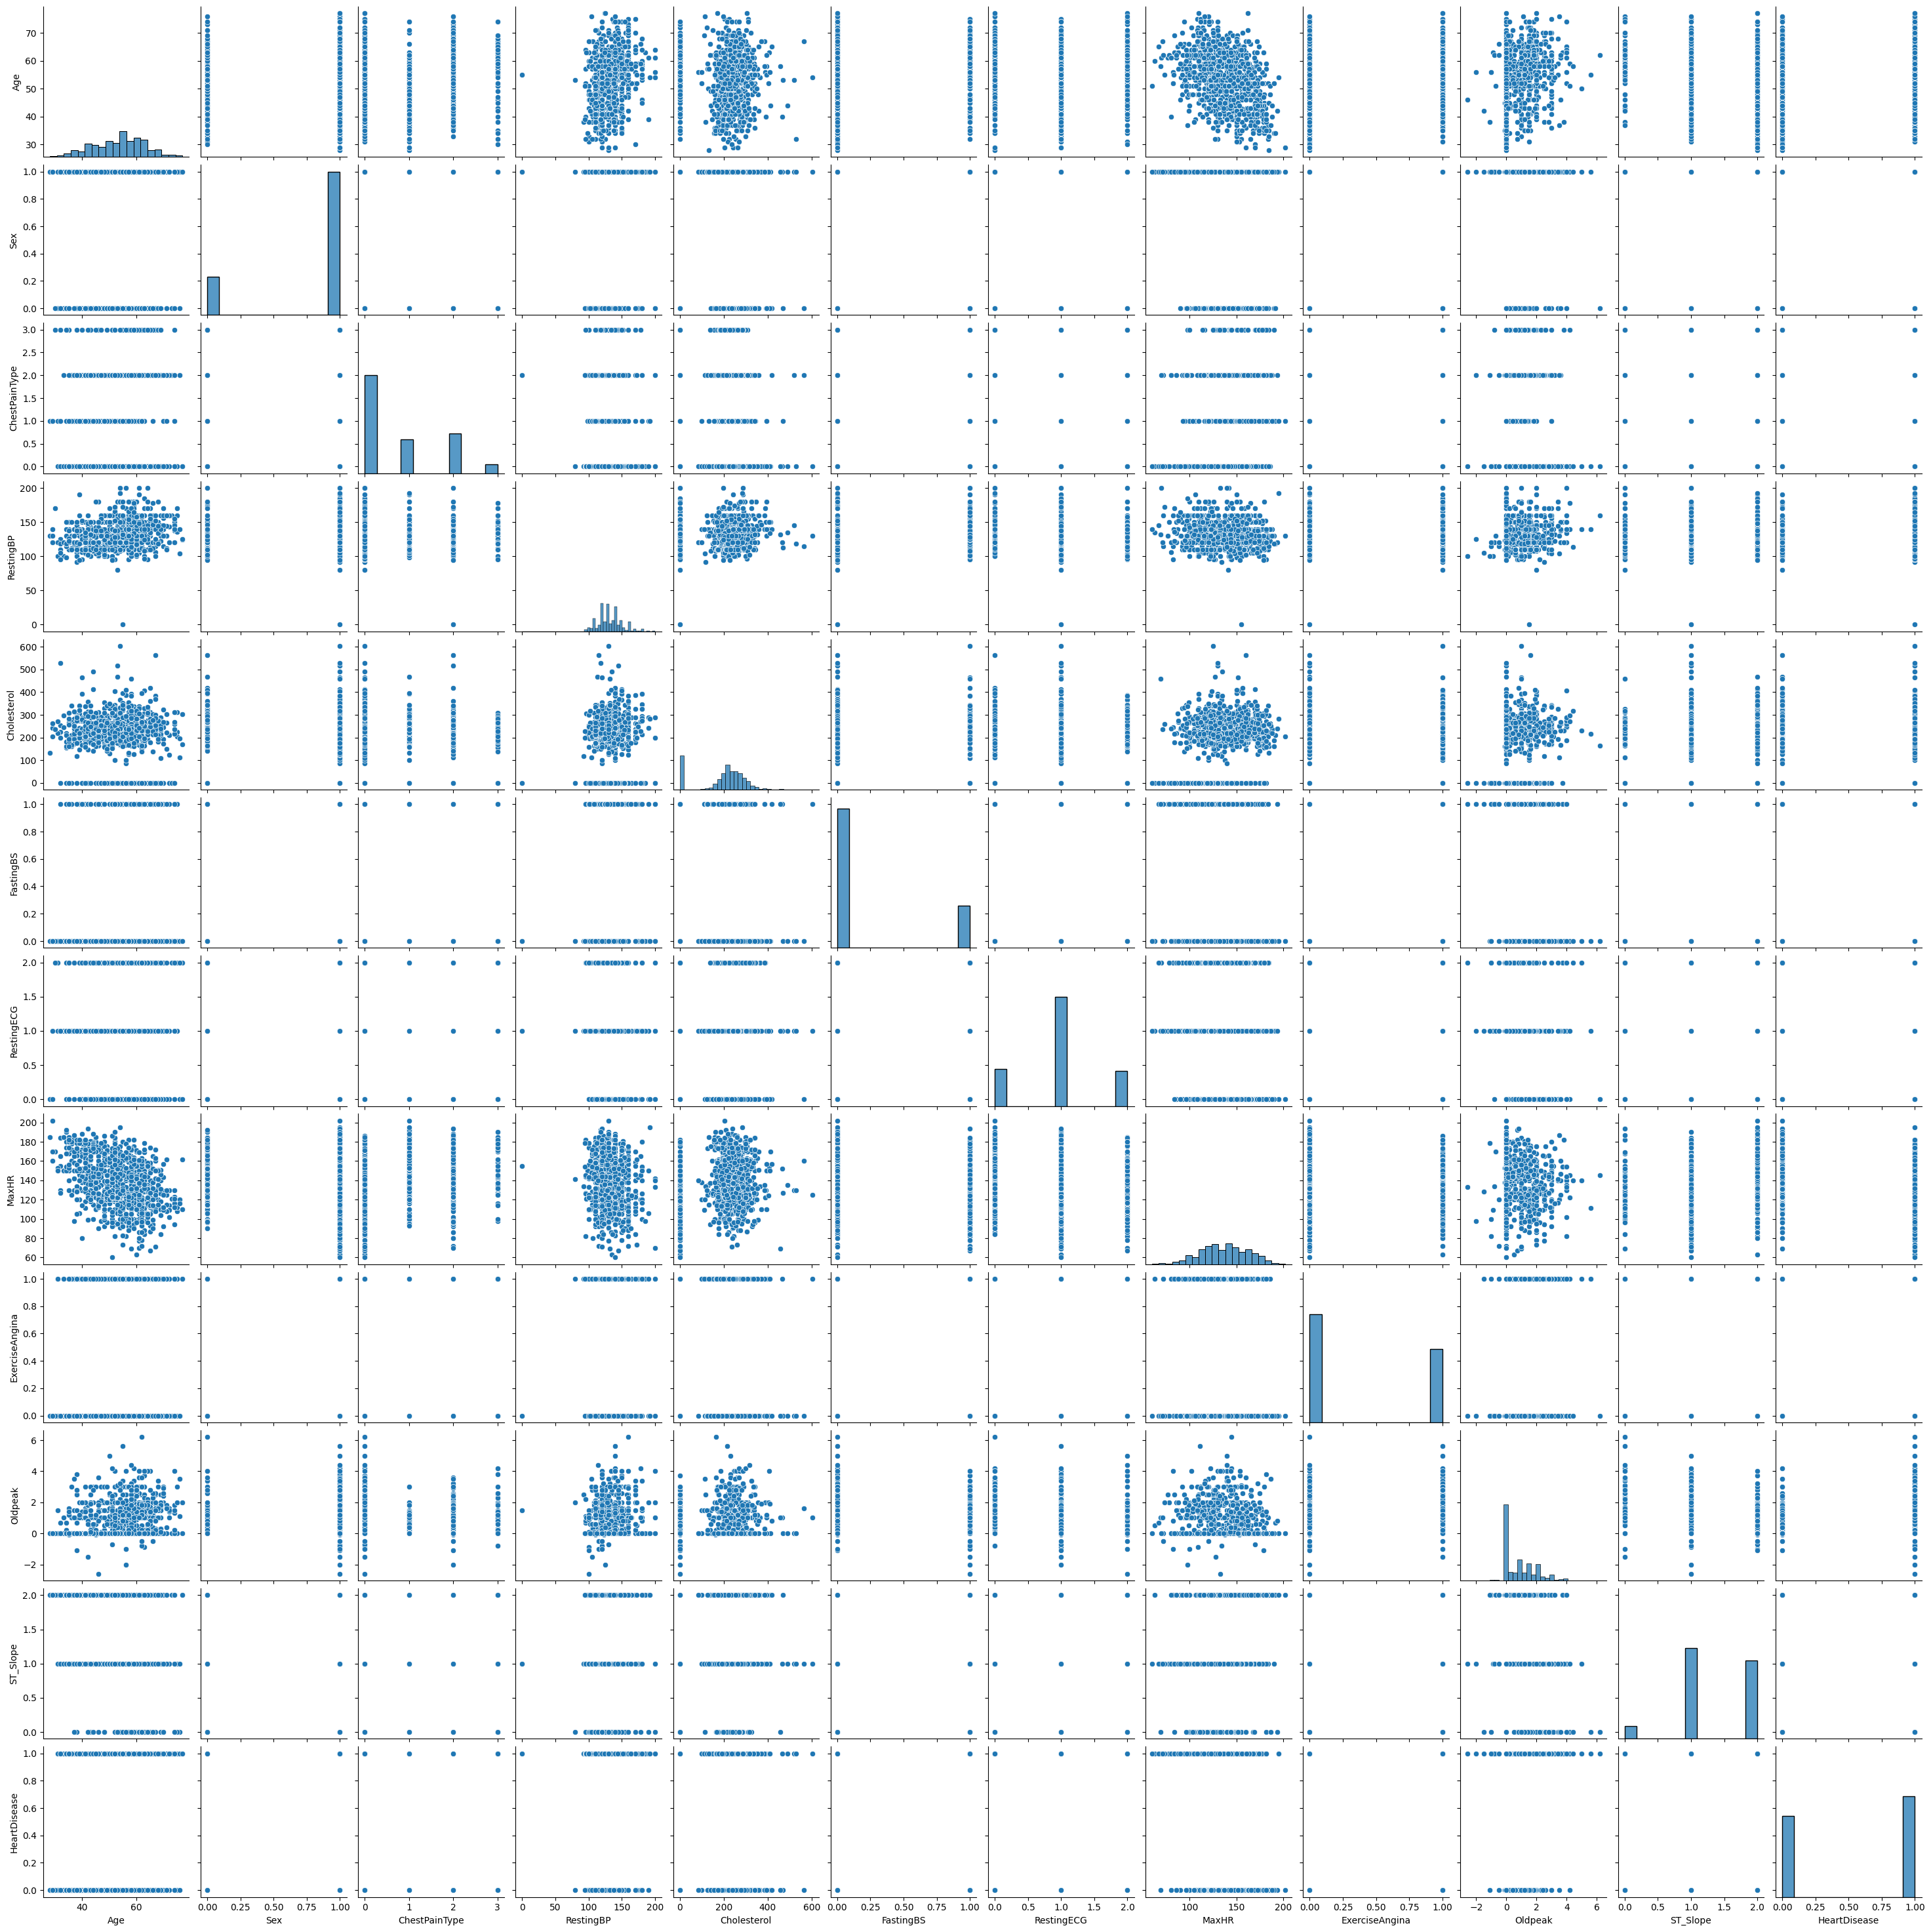

In [126]:
sns.pairplot(df)

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'ChestPainType'}>],
       [<Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'RestingECG'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'ExerciseAngina'}>],
       [<Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'ST_Slope'}>,
        <Axes: title={'center': 'HeartDisease'}>]], dtype=object)

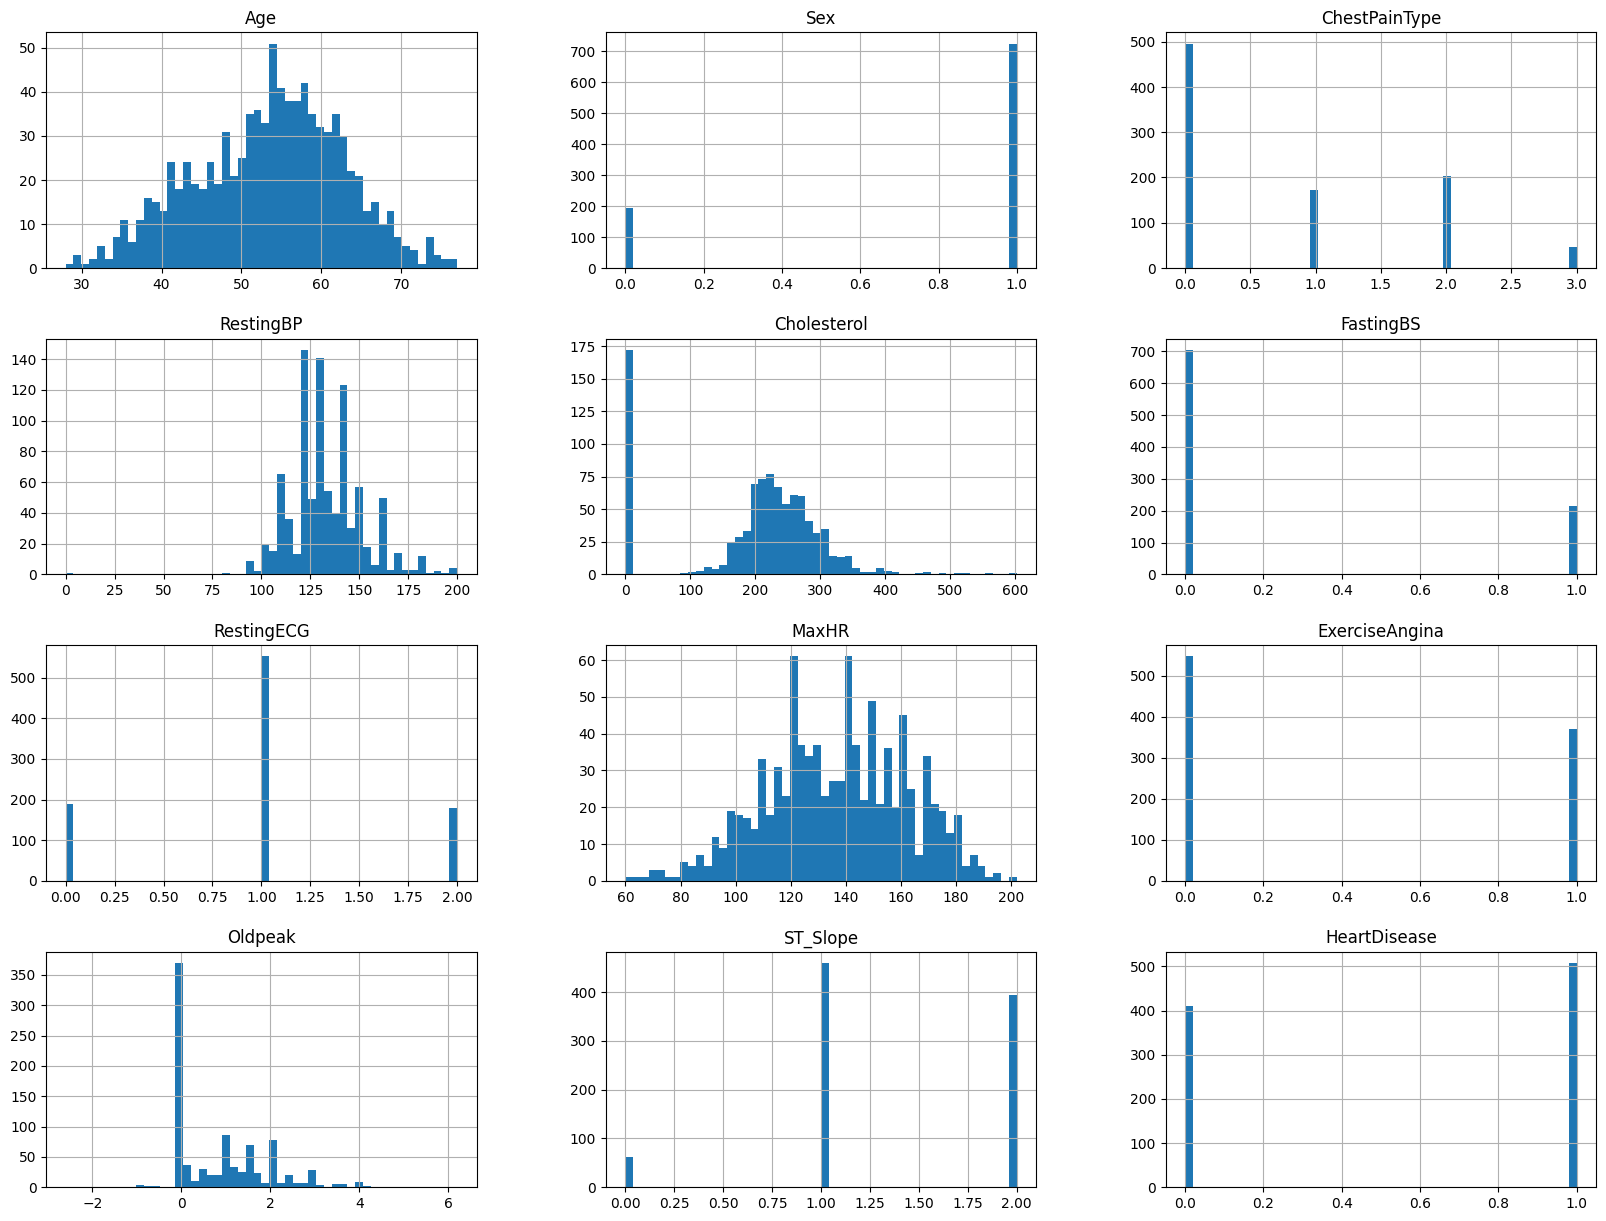

In [127]:
df.hist(bins= 50, figsize= (20, 15))

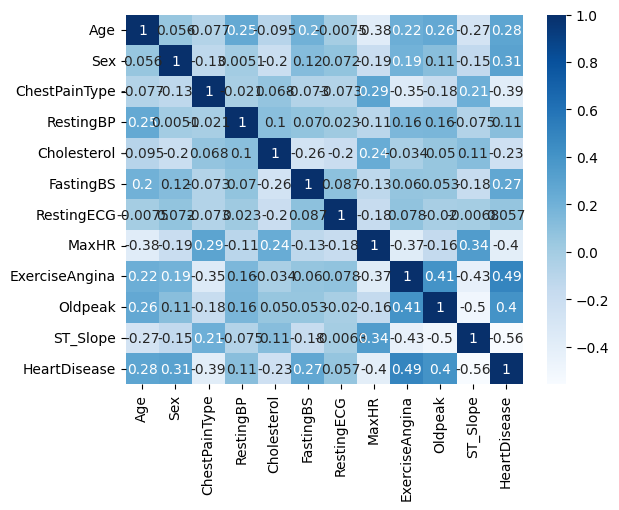

In [128]:
ax = sns.heatmap(data = df.corr(), cmap = 'Blues', annot = True)

In [129]:
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [130]:
y = df["HeartDisease"]
x= df.drop(["HeartDisease"], axis =1)

In [131]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
x=scaler.fit_transform(x)
x=Normalizer().fit_transform(x)

In [132]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)
x_resampled.shape,y_resampled.shape

((1016, 11), (1016,))

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled ,test_size=0.3, random_state=0)

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
model=RandomForestClassifier(n_estimators=10, n_jobs=1,random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.898
Precision score: 0.898
Recall score: 0.898
F1 score: 0.898


In [136]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


Features **Selection**

In [137]:
from sklearn.feature_selection import SelectKBest

In [138]:
from sklearn.feature_selection import f_classif

In [139]:
Fit_feature = SelectKBest(score_func = f_classif)

In [140]:
Fit_feature.fit(x, y)

SelectKBest()

In [141]:
score_col = pd.DataFrame(Fit_feature.scores_, columns = ['score values'])

In [142]:
score_col

,score values
0,77.256796
1,83.122704
2,161.824582
3,11.755650
4,47.898441
5,67.698239
6,1.520234
7,179.172612
8,300.438600
9,219.938101


In [143]:
import pandas as pd
import pandas as pd

Name_col = pd.DataFrame(x)


In [144]:
top_features = pd.concat([Name_col, score_col], axis = 1)

In [145]:
top_features.nlargest(8, 'score values')

,0,1,2,3,4,5,6,7,8,9,10,score values
10,-0.520934,-0.576499,0.379261,-0.038523,0.033194,-0.163994,0.005132,0.060674,-0.244963,-0.247604,0.312947,488.253498
8,-0.676039,0.199162,-0.315367,0.158614,0.028954,-0.212822,0.006660,-0.103294,0.468709,0.221843,-0.230091,300.438600
9,-0.201385,-0.667714,0.078904,-0.230798,0.268488,-0.189942,0.005944,-0.227575,-0.283722,-0.286780,0.362462,219.938101
7,0.024144,0.240110,0.106585,-0.563266,0.039164,-0.256579,0.008030,0.094928,-0.383260,-0.387391,0.489625,179.172612
2,-0.512717,0.151047,0.067050,-0.037915,0.225476,-0.161407,0.468763,-0.446490,-0.241099,-0.243698,0.308011,161.824582
1,-0.152972,-0.619635,0.407639,0.476916,-0.054976,-0.176265,0.005516,0.241106,-0.263293,0.033781,-0.190567,83.122704
0,-0.509339,0.183370,0.081398,0.146037,0.293231,-0.195947,0.006132,0.491494,-0.292693,-0.295847,0.373922,77.256796
5,-0.467540,0.156722,0.387303,-0.203494,0.389540,-0.167471,0.005241,0.396194,-0.250157,-0.252854,0.319582,67.698239


In [146]:
import pandas as pd

# Assuming x has 11 columns, create a DataFrame with default column names first
all_columns = ['yr', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'active', 'smoke', 'extra_col1', 'extra_col2', 'extra_col3']
x = pd.DataFrame(x, columns=all_columns)

# Now select only the 8 columns you need
x = x[['yr', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'active', 'smoke']]




In [147]:
x

,yr,cholesterol,weight,gluc,ap_lo,ap_hi,active,smoke
0,-0.509339,0.183370,0.081398,0.146037,0.293231,-0.195947,0.006132,0.491494
1,-0.152972,-0.619635,0.407639,0.476916,-0.054976,-0.176265,0.005516,0.241106
2,-0.512717,0.151047,0.067050,-0.037915,0.225476,-0.161407,0.468763,-0.446490
3,-0.199069,-0.660036,-0.278225,0.103126,0.047350,-0.187758,0.005876,-0.385552
4,0.021319,0.212019,0.523957,0.390928,-0.014282,-0.226561,0.007090,-0.239152
...,...,...,...,...,...,...,...,...
913,-0.289136,0.165247,0.743386,-0.387647,0.191010,-0.176581,0.005526,-0.060532
914,0.416776,0.139916,-0.221552,0.170050,-0.014386,0.491854,0.004679,0.044659
915,0.175907,0.245230,-0.388315,-0.061557,-0.294764,-0.262051,0.008201,-0.407362
916,0.113145,-0.592526,0.070019,-0.039594,0.104027,-0.168553,-0.478967,0.446810


Split Data set into train, test **data**

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

**RandomForestClassifier**

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rfc = RandomForestClassifier(n_estimators = 50)

In [152]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [153]:
rfc.score(x_test, y_test)

0.8152173913043478

**Performances for RandomForest Classifier**

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
pred = rfc.predict(x_test)

In [156]:
accuracy_score(y_test, pred)

0.8152173913043478

In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
confusion_matrix(y_test, pred)

array([[ 86,  27],
       [ 24, 139]])

In [159]:
from sklearn.metrics import classification_report

In [160]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       113
           1       0.84      0.85      0.84       163

    accuracy                           0.82       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.82      0.81       276



**Support Vector Machine**

In [161]:
from sklearn.svm import SVC

In [162]:
sv = SVC()

In [163]:
sv.fit(x_train, y_train)

SVC()

# **Performances for Support Vector Machine**

In [164]:
from sklearn.metrics import accuracy_score

In [165]:
pred1 = sv.predict(x_test)

In [166]:
accuracy_score(y_test, pred1)

0.8260869565217391

In [167]:
from sklearn.metrics import confusion_matrix

In [168]:
confusion_matrix(y_test, pred1)

array([[ 89,  24],
       [ 24, 139]])

In [169]:
from sklearn.metrics import classification_report

In [170]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       113
           1       0.85      0.85      0.85       163

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276



# **KNN Classifier**

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
knn = KNeighborsClassifier()

In [173]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [174]:
pred2 = knn.predict(x_test)

**Performane for KNN**

In [175]:
accuracy_score(y_test, pred2)

0.8007246376811594

In [176]:
confusion_matrix(y_test, pred2)

array([[ 88,  25],
       [ 30, 133]])

In [177]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       113
           1       0.85      0.85      0.85       163

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276



# **Naive Bayes**

In [178]:
from sklearn.naive_bayes import GaussianNB

In [179]:
GNB = GaussianNB()

In [180]:
GNB.fit(x_train, y_train)

GaussianNB()

In [181]:
pred3 = GNB.predict(x_test)

**Performance for Naive Bayes**

In [182]:
accuracy_score(y_test, pred3)

0.8043478260869565

In [183]:
confusion_matrix(y_test, pred3)

array([[ 88,  25],
       [ 29, 134]])

In [184]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       113
           1       0.85      0.85      0.85       163

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276



# **Bernoulli Naive Bayes**

In [185]:
from sklearn.naive_bayes import BernoulliNB

In [186]:
BNB = BernoulliNB()

In [187]:
BNB.fit(x_train, y_train)

BernoulliNB()

**Performance for Bernoulli Naive Bayes**

In [188]:
pred4 = BNB.predict(x_test)

In [189]:
accuracy_score(y_test, pred4)

0.8007246376811594

# **Decision Tree**

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
dtc = DecisionTreeClassifier()

In [192]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [193]:
pred5 = dtc.predict(x_test)

In [194]:
accuracy_score(y_test, pred5)

0.75